In [2]:
import os
from os.path import join
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import matplotlib.pyplot as plt

from PIL import Image

In [34]:
n_epoch = 8000
size_batch = 10

def get_tensor(path):
    tensor = torch.load(path)
    tensor = np.array(tensor)
    tensor = tensor.astype(np.float32)
    return tensor

def x_batch_maker(n):
    n  = list(map(get_tensor,n))
    return torch.tensor(n)

def get_class(n):
    c = str(n).split('/')[-2]
    c = int(c.split("_")[-1])
    return c

def t_batch_maker(n):
    n = list(map(get_class,n))
    return torch.tensor(n)

test_list = [[f"E:/procon/data/4x4_LearnDirection_v5/{k}/{a*size_batch + j}.pt" for j in range(size_batch) for k in range(5)] for a in range(n_epoch)]
x_batch =  map(x_batch_maker,test_list)
t_batch =  map(t_batch_maker,test_list)

In [6]:
class directionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4*4*4,64)# Input Layer to Intermediate modules
        self.fc2 = nn.Linear(64,64) #Intermediate modules to Output Layer
        self.fc3 = nn.Linear(64,32) #Intermediate modules to Output Layer
        self.fc4 = nn.Linear(32,32) #Intermediate modules to Output Layer
        self.fc5 = nn.Linear(32,16) #Intermediate modules to Output Layer
        self.fc6 = nn.Linear(16,16)
        self.fc7 = nn.Linear(16,8)
        self.fc8 = nn.Linear(8,8)
        self.fc9 = nn.Linear(8,5)  

    def forward(self, x):#順伝播 Forward propagation
        x = x.view(-1,4*4*4)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        x = self.fc6(x)
        x = self.fc7(x)
        x = self.fc8(x)
        y = self.fc9(x)
        return y

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
mymodel = directionModel().to(device)
opt = optim.Adagrad(mymodel.parameters(), lr=0.08)

1
- now 0
- batch accuracy: 0.36
- max accuracy: 0
- now 1
- batch accuracy: 0.34
- max accuracy: 0
- now 2
- batch accuracy: 0.36
- max accuracy: 0
- now 3
- batch accuracy: 0.36
- max accuracy: 0
- now 4
- batch accuracy: 0.26
- max accuracy: 0
- now 5
- batch accuracy: 0.44
- max accuracy: 0
- now 6
- batch accuracy: 0.48
- max accuracy: 0
- now 7
- batch accuracy: 0.34
- max accuracy: 0
- now 8
- batch accuracy: 0.42
- max accuracy: 0
- now 9
- batch accuracy: 0.58
- max accuracy: 0
- now 10
- batch accuracy: 0.26
- max accuracy: 0
- now 11
- batch accuracy: 0.36
- max accuracy: 0
- now 12
- batch accuracy: 0.4
- max accuracy: 0
- now 13
- batch accuracy: 0.42
- max accuracy: 0
- now 14
- batch accuracy: 0.54
- max accuracy: 0
- now 15
- batch accuracy: 0.44
- max accuracy: 0
- now 16
- batch accuracy: 0.32
- max accuracy: 0
- now 17
- batch accuracy: 0.38
- max accuracy: 0
- now 18
- batch accuracy: 0.46
- max accuracy: 0
- now 19
- batch accuracy: 0.38
- max accuracy: 0
- now 20


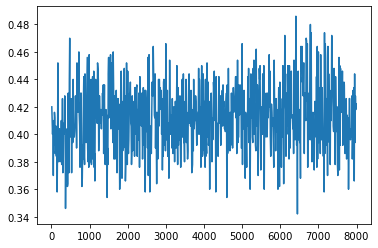

In [35]:
plot_x = []
# ロスと精度を保存するリスト（訓練用・テスト用）
list_loss_train = []
list_loss_test = []
list_acc_train = []
list_acc_test = []
list_acc_all  =[]
plot_xx = []

temp_accs = []
temp_max = 0
temp_model = mymodel
i = 0
nice = 0
kk = 0
stay = [0.25]
print(len(stay))
mymodel.train()
while i < n_epoch:
    
    sum_loss = 0.
    sum_acc = 0.
    test_acc = 0.
    opt.zero_grad()
    
    x = next(x_batch).to(device)
    t = next(t_batch).to(device)
    y = mymodel(x)
    loss = F.cross_entropy(y, t)

    # 逆伝播
    
    loss.backward()

    

    # ロスと精度を蓄積
    sum_loss += loss.item()
    sum_acc += (y.max(1)[1] == t).sum().item()

    # パラメータ更新
    
    #scheduler.step()

    batch_loss = sum_loss / len(x)
    batch_acc = sum_acc / len(x)
    list_loss_train.append(batch_loss)

    

    print(f"- now {i}")
    #print("- mean loss:", mean_loss)
    print("- batch accuracy:", batch_acc) 
    print("- max accuracy:", temp_max)
    temp_accs.append(batch_acc)
    
    if i%10==0 and i != 0:
        ave = sum(temp_accs)/10
        temp_accs.clear()
        list_acc_train.append(ave)
        plot_x.append(i)
        # if ave < 0.2:
        #     mymodel = temp_model
        #     i = i -100 
        

    # if batch_acc > 0.8:
    #     i += 1
    # elif batch_acc > 0.85 or kk > 100:
    #     i+= 1
    #     kk = 0
    # else:
    #     kk += 1
    opt.step()
    i += 1
    
    
    
      

print("fin v5 both steped")

print(list_acc_train)
print(f"max acc {max(list_acc_train)}")
print(f"-mean acc {sum(list_acc_train)/len(list_acc_train)}")
plt.plot(plot_x,list_acc_train)
print(nice)

In [36]:
ev_epoch = 100
size_batch = 10

test_list = [[f"E:/procon/data/4x4_LearnDirection_v5/{k}/{size_batch*n_epoch+a*size_batch + j}.pt" for j in range(size_batch) for k in range(5)] for a in range(ev_epoch)]
ex_batch =  map(x_batch_maker,test_list)
et_batch =  map(t_batch_maker,test_list)

- now 0
- batch accuracy: 0.48
- now 1
- batch accuracy: 0.6
- now 2
- batch accuracy: 0.42
- now 3
- batch accuracy: 0.5
- now 4
- batch accuracy: 0.34
- now 5
- batch accuracy: 0.38
- now 6
- batch accuracy: 0.34
- now 7
- batch accuracy: 0.4
- now 8
- batch accuracy: 0.38
- now 9
- batch accuracy: 0.52
-mean acc :0.43599999999999994


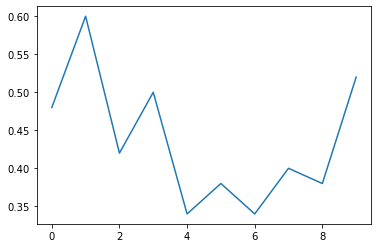

In [22]:
eve_accs = []
eve_x =[]

for i in range(ev_epoch):
    sum_acc = 0.

    x_e = next(ex_batch).to(device)
    t_e = next(et_batch).to(device)
    mymodel.eval()
    y = mymodel(x_e)
    sum_acc += (y.max(1)[1] == t).sum().item()
    mean_acc = sum_acc / len(x)
    eve_accs.append(mean_acc)
    eve_x.append(i)
    print(f"- now {i}")
    print("- batch accuracy:", mean_acc) 

print(f"-mean acc :{sum(eve_accs)/len(eve_accs)}")
plt.plot(eve_x,eve_accs)

Confusion matrix, without normalization
[[ 336  208  198  226    0]
 [ 350  378  402  369    0]
 [  98  159  173  140    0]
 [ 216  255  227  265    0]
 [   0    0    0    0 1000]]


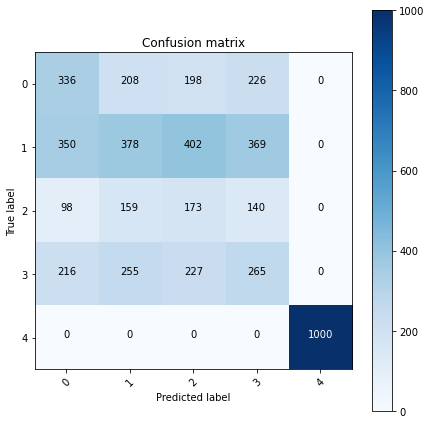

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
ys = []
ts = []
for i in range(ev_epoch):
    ex = next(ex_batch).to(device)
    et = next(et_batch).to(device)

    y = mymodel(ex)
    y = torch.argmax(y, dim=1) # 確率の最大のインデックスを取得
    ys.append(y.cpu()) 
    ts.append(et.cpu())

ys = torch.cat(ys, dim=0)
ts = torch.cat(ts, dim=0)

# confusion matrixを表示するための関数
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confmat = confusion_matrix(ys, ts)
confmat

#array([[879,  91],
#       [ 88, 950]])

classes = ['0','1','2','3','4']

plt.figure(figsize=(6, 6))
plot_confusion_matrix(confmat, classes=classes, normalize=False)

In [15]:
#モデルの保存
model_path = '4x4_direction_v1_model.pth'
torch.save(mymodel.state_dict(), model_path)